In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
dfWithGenreList = pd.read_csv('../dataset/songs_one_hot_encoding.csv',
                 encoding='iso-8859-1', na_values='unknown')

generos_relevantes = pd.read_csv('../dataset/genres_relevant.csv',
                 encoding='iso-8859-1', na_values='unknown')

df = df.dropna()

In [29]:
generos_relevantes

,Unnamed: 0,0
0,pop,675
1,dance pop,656
2,pop rap,439
3,post-teen pop,360
4,r&b,339
5,rap,304
6,urban contemporary,266
7,hip hop,238
8,hip pop,221
9,southern hip hop,192


Observamos aqui certa semelhança com o dataframe quando tratado em sua interidade. Músicas que contém o estilo r&b, urban contemporary e hip hop também atingiram posições mais altas no ranking. A média do rank porém não foi semelhante. Em questão de permanência no top 100, os gêneros neo_mellow e pop rock também continuam os mais altos.

Assim, agora vamos analisar se as músicas que atingem as posições mais altas realmente tem gêneros em comum ou se isso pode ser explicado pelo acaso.

In [30]:
#agrupa por gênero para tirar estatísticas
def agruparGeneros(generos_relevantes, dfGenreRank):    
    estatisticas_generos = {}
    for i in range(generos_relevantes.shape[0]):
        genero = generos_relevantes.index.values[i]
        df_genero = dfGenreRank[['peak_pos', 'weeks', 'rank', genero]]
        group_genero = df_genero[df_genero[genero] == True]
        group_genero = group_genero.mean()[['peak_pos', 'weeks', 'rank']]

        estatisticas_generos[genero] = group_genero

    return pd.DataFrame.from_dict(estatisticas_generos, orient='index')

estatisticas_generos = agruparGeneros(generos_relevantes, dfWithGenreList)
estatisticas_generos

KeyError: '[0] not in index'

In [17]:
def bootstrap(df, n = 10000):
    size = len(df)
    values = []
    
    for i in range(n):
        sample = dfWithGenreList.sample(size, replace=True)
        values.append(agruparGeneros(generos_relevantes, sample)['peak_pos'])
    return values

In [18]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [19]:
resultado_bootstrap = pd.DataFrame(bootstrap(dfWithGenreList, 1000))

NameError: name 'agruparGeneros' is not defined

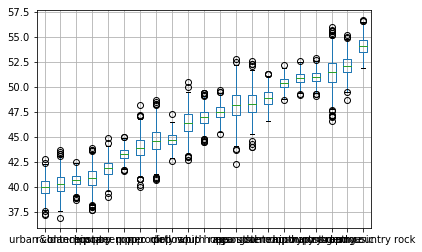

In [23]:
resultado_bootstrap = resultado_bootstrap.reindex(resultado_bootstrap.mean().sort_values().index, axis=1)
resultado_bootstrap.boxplot()

In [24]:
resultado_bootstrap_copia = resultado_bootstrap.copy()
averages = resultado_bootstrap_copia.mean()
averages_sorted = averages.sort_values()
top_5_generos_peak_pos_bootstrap = resultado_bootstrap[averages_sorted[:5].keys()]

In [25]:
top_5_generos_peak_pos_real = {"a":40}
chaves = averages_sorted[:5].keys()
for i in range(5):
    for j in estatisticas_generos.index:
        if j == chaves[i]:
            top_5_generos_peak_pos_real[chaves[i]] = estatisticas_generos.get_value(j, col='peak_pos')

top_5_generos_peak_pos_real = pd.Series(top_5_generos_peak_pos_real)
top_5_generos_peak_pos_real

C:\Users\Luiz\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


a                     40.000000
r&b                   39.892157
urban contemporary    40.230843
dance pop             40.623836
hip pop               40.816857
post-teen pop         41.799104
dtype: float64

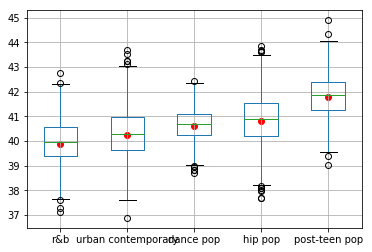

Index(['a', 'r&b', 'urban contemporary', 'dance pop', 'hip pop',
       'post-teen pop'],
      dtype='object')

In [26]:
top_5_generos_peak_pos_bootstrap.boxplot()
plt.scatter(y=top_5_generos_peak_pos_real.values, x=top_5_generos_peak_pos_real.keys(), color='red')
plt.show()
top_5_generos_peak_pos_real.keys()

Assim, podemos observar que o nosso resultado inicial coincide com a média encontrada a partir da realização do bootstrap, o que é uma evidência convincente que os gêneros com músicas melhores colocas não é causado pelo acaso.